# Practical Session 3
## Biomedical Signals and Images
## Biomedical Image Processing (Image enhancement, Filtering and Segmentation)
### ETRO: Deparment of Electronics and Informatics
### Vrije Universiteit Brussel

Hamza Mekhzoum and Jef Vandemeulebroucke

Questions email or Teams: hamza.mekhzoum@vub.be


#### Student Names and IDs: 

<font color=blue>Students names and IDs: </font> <Br> Seyed Hossein Mohammadi - 0610734
<font color=blue>Academic Year </font>: 2023-2024

# Purpose
The purpose of this exercise session is to obtain insight in the image enhancement, filtering and segmentation operations commonly applied in medical image processing. For more information on these concepts see the course slides and the related material.

The jupyter notebook should be submitted as the report of each practical session by teams of two students. In [colab](https://colab.research.google.com/notebooks/welcome.ipynb) you should download the notebook in the format *.ipynb and save it as a pdf version through print->save as pdf. Both the jupyter notebook and the pdf should be uploaded on canvas in a zip file before the deadline. The deadline for the report submission is December 18th, 2023, at 23.59.

Any report sent after the deadline will not be graded. 

### Required modules
- [numpy](https://pypi.org/project/numpy/)
- [pylab](https://scipy.github.io/old-wiki/pages/PyLab)
- [scipy](https://www.scipy.org/getting-started.html)
- [skimage](https://scikit-image.org/docs/dev/api/skimage.html#module-skimage)
- [math](https://docs.python.org/3/library/math.html)
- [sklearn](https://scikit-learn.org/stable/index.html)
- [Matplotlib](https://matplotlib.org/3.1.1/index.html)

### 1 Image enhancement
#### 1.1 The image histogram
The histogram is a representation of how many pixels have a certain intensity in the corresponding image. Medical images can however have a large intensity range, or even floating point intensities, making the pixel count per intensity low or impractical. In practice, intensities are therefore usually binned, i.e. grouped in a reduced number of bins with similar intensity.
#### 1.2  Image enhancement
We shall discuss two ways of contrast improvement. The first is [linear contrast mapping](http://homepages.inf.ed.ac.uk/rbf/HIPR2/stretch.htm) or [histogram stretching](https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html), which involves a linear transformation on the image intensities, such that the transformed intensities cover to the full range.
Another way to improve the contrast is to perform [histogram equalisation](https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html). In this case, the aim is to obtain a uniform histogram, in which all intensities are equally represented. This can be done by applying a nonlinear transformation on the image intensities. It can be shown that the transform corresponds to the cumulative histogram.

#### Example 1: Linear contrast mapping 

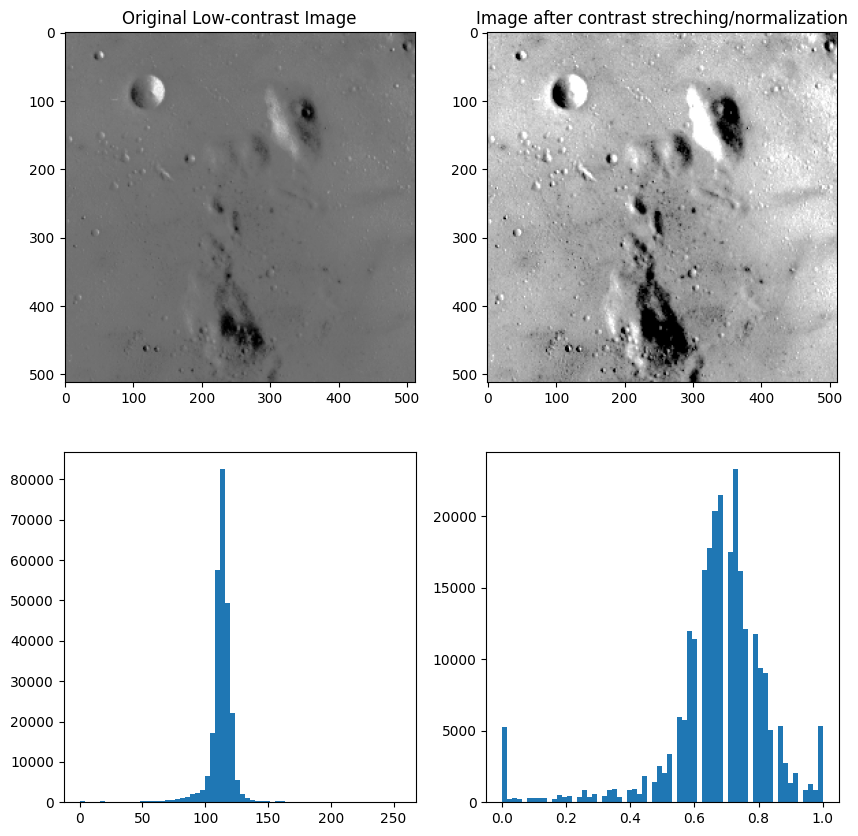

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from pylab import show, title, figure, imshow, subplot, subplots_adjust, hist

# Load an example image
low_contrast_image = data.moon()

"contrast stretching (i.e., normalization),"
"where the image is rescaled to include all intensities that fall within the 2nd and 98th percentiles."

p2, p98 = np.percentile(low_contrast_image, (2, 98))

i_min, i_max = p2, p98

image_cliping = np.clip(low_contrast_image, i_min, i_max)

image_constrast_streched = (image_cliping - i_min) / float(i_max - i_min)

"Displaying low contrast image, contrast-enhanced image and their corresponding histogrms"

h, w = 2, 2  # figure height and width 
figure(figsize=(10, 10))
subplots_adjust(hspace=.2)

subplot(h, w, 1)
imshow(low_contrast_image, cmap='gray')
title('Original Low-contrast Image')

subplot(h, w, 2)
imshow(image_constrast_streched, cmap='gray')
title('Image after contrast streching/normalization')

subplot(h, w, 3)
hist(np.array(low_contrast_image).astype(float).ravel(), bins=64)  #plotting histogram of original low-contrast image

subplot(h, w, 4)
hist(image_constrast_streched.ravel(), bins=64)  #plotting histogram of contrast streched/normalized image
show()

#### Exercise 1.1: Linear contrast mapping
By following above example 1, solve the below exercise. 

- Read an image (Brain.tiff) 
  
  hint: user can load the image in different ways, like: [skimage.io.imread](https://scikit-image.org/docs/dev/api/skimage.io.html#skimage.io.imread), [plt.imread](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imread.html), [imread](https://pypi.org/project/imread/)
  
  preferable: from imread import imread. Install imread with pip install imread
- Perform linear contrast mapping (contrast streching/normalization)
- Display input image, output image (after linear contrast mapping), their corresponding histograms with 64 bins in a 2x2 figure. 

#### Report
- Look at the output result and its histogram. Compare it with the histogram of the original input image. Comment about difference between them. 

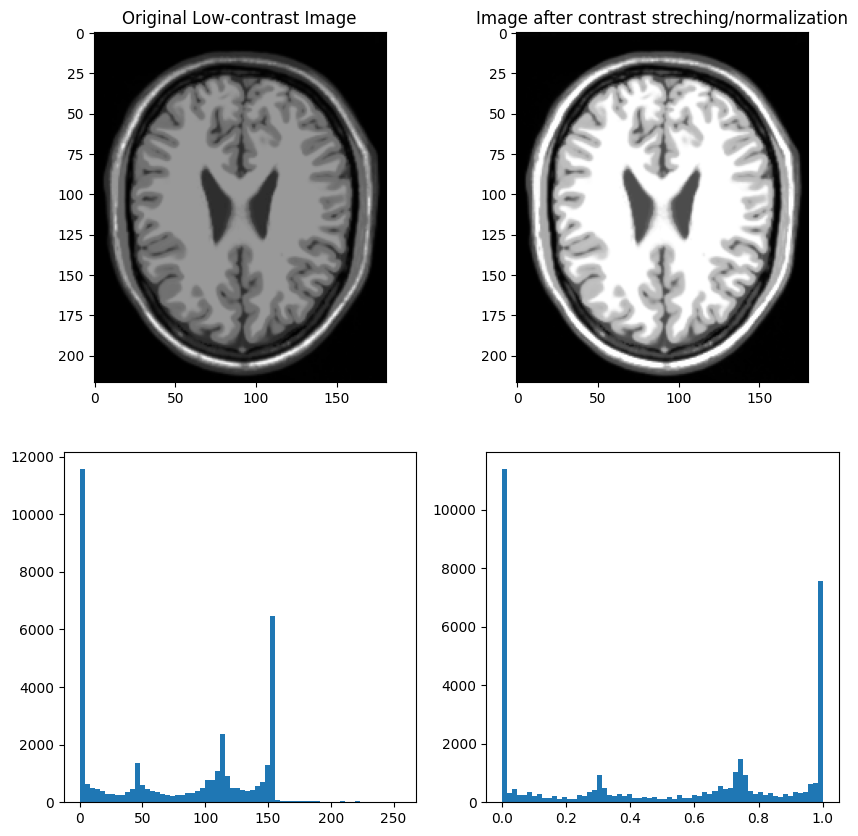

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from pylab import show, title, figure, imshow, subplot, subplots_adjust, hist

# Load an example image
low_contrast_image = plt.imread('Brain.tiff')

"contrast stretching (i.e., normalization),"
"where the image is rescaled to include all intensities that fall within the 2nd and 98th percentiles."

p2, p98 = np.percentile(low_contrast_image, (2, 98))

i_min, i_max = p2, p98

image_cliping = np.clip(low_contrast_image, i_min, i_max)

image_constrast_streched = (image_cliping - i_min) / float(i_max - i_min)

"Displaying low contrast image, contrast-enhanced image and their corresponding histogrms"

h, w = 2, 2  # figure height and width 
figure(figsize=(10, 10))
subplots_adjust(hspace=.2)

subplot(h, w, 1)
imshow(low_contrast_image, cmap='gray')
title('Original Low-contrast Image')

subplot(h, w, 2)
imshow(image_constrast_streched, cmap='gray')
title('Image after contrast streching/normalization')

subplot(h, w, 3)
hist(np.array(low_contrast_image).astype(float).ravel(), bins=64)  #plotting histogram of original low-contrast image

subplot(h, w, 4)
hist(image_constrast_streched.ravel(), bins=64)  #plotting histogram of contrast streched/normalized image
show()

#### Report
the histogram of the new image is capped, shoving all the values above (or below) a range in to the same bin. this is evevdent as all color values above ~150 have been shoved into the last bin, increasing its count by ~500 which can be seen in the last histogram column. 

this means that when plotting the image, the all colors that were once considered gray are not completely white and everything has been stretched to the same range.

#### Example 2: Histogram equalisation
Students are suggested to have a look into [np.histogram](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html) for a calculation of histogram.

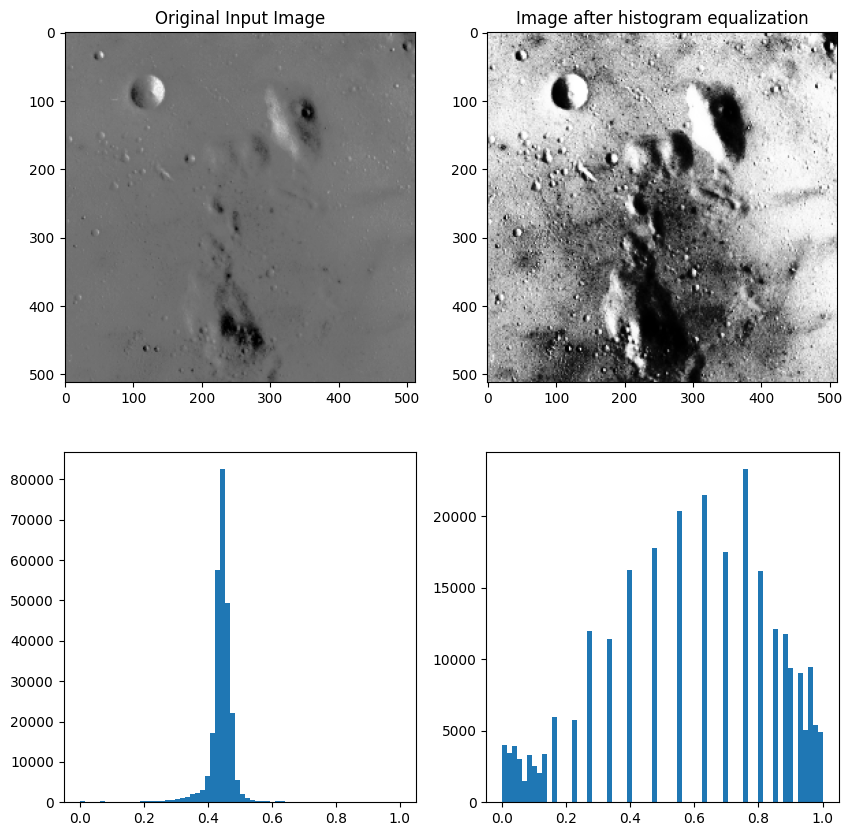

In [3]:
import numpy as np
from skimage import data
import pylab
from pylab import show, title, figure, imshow, subplot, subplots_adjust

"Load an example image"
image = data.moon()

"calculation of histogram"
hist, bin_edges = np.histogram(image.ravel(), bins=64)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
img_cdf = hist.cumsum()
img_cdf = img_cdf / float(img_cdf[-1])
out = np.interp(image.flat, bin_centers, img_cdf)
img_eq = out.reshape(image.shape)

"Displaying input image, image-histogram equalized and their corresponding histogrms"

h, w = 2, 2  # figure height and width 
figure(figsize=(10, 10))
subplots_adjust(hspace=.2)

subplot(h, w, 1)
imshow(image, cmap='gray')
title('Original Input Image')

subplot(h, w, 2)
imshow(img_eq, cmap='gray')
title('Image after histogram equalization')

subplot(h, w, 3)
pylab.hist(np.array(image).astype(float).ravel() / image.max(),
           bins=64)  #plotting histogram of original low-contrast image

subplot(h, w, 4)
pylab.hist(img_eq.ravel() / img_eq.max(), bins=64)  #plotting histogram of histogram-equalized image
show()



#### Exercise 1.2: Histogram equalization 
By following the example 2, solve the below exercise. 

- Read an image (Brain.tiff) using [imread](https://pypi.org/project/imread/)
  
  eg: from imread import imread
  
  
- Perform histogram equalization [np.histogram](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html)
- Display input image, output image (after linear contrast mapping) of exercise 1.1, output image (histogram-equalized), their corresponding histograms with 64 bins in a 3x2 figure. 

#### Report
- Look at the output results and their histograms. Compare them with the histogram of the original input image. The histogram of the histogram-equalized output image is not perfectly uniform. What is the reason for this? 

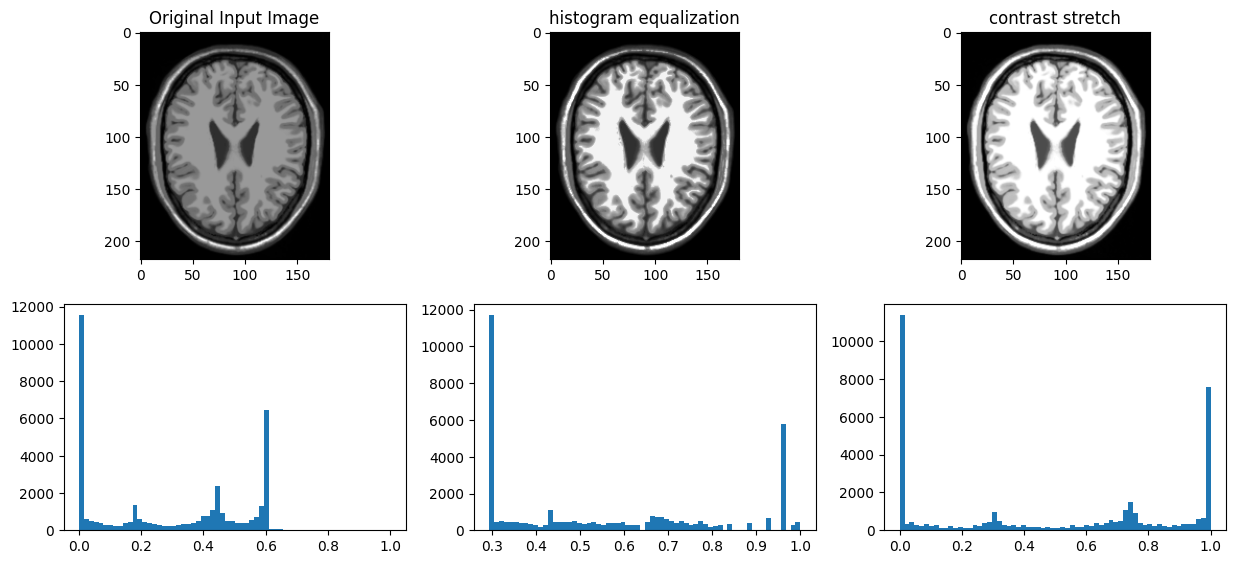

In [4]:
import numpy as np
from skimage import data
import pylab
from pylab import show, title, figure, imshow, subplot, subplots_adjust

"Load an example image"
image = plt.imread('Brain.tiff')

"calculation of histogram"
hist, bin_edges = np.histogram(image.ravel(), bins=64)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
img_cdf = hist.cumsum()
img_cdf = img_cdf / float(img_cdf[-1])
out = np.interp(image.flat, bin_centers, img_cdf)
img_eq = out.reshape(image.shape)

"Displaying input image, image-histogram equalized and their corresponding histogrms"

h, w = 3, 3  # figure height and width 
figure(figsize=(15, 10))
subplots_adjust(hspace=.2)

subplot(h, w, 1)
imshow(image, cmap='gray')
title('Original Input Image')

subplot(h, w, 2)
imshow(img_eq, cmap='gray')
title('histogram equalization')

subplot(h, w, 3)
imshow(image_constrast_streched, cmap='gray')
title('contrast stretch')

subplot(h, w, 4)
pylab.hist(np.array(image).astype(float).ravel() / image.max(),
           bins=64)  #plotting histogram of original low-contrast image

subplot(h, w, 5)
pylab.hist(img_eq.ravel() / img_eq.max(), bins=64)  #plotting histogram of histogram-equalized image

subplot(h, w, 6)
pylab.hist(image_constrast_streched.ravel(), bins=64)  #plotting histogram of contrast streched/normalized image
show()



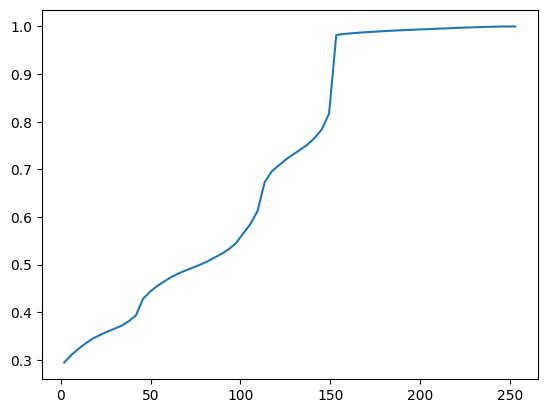

In [5]:
plt.plot(bin_centers, img_cdf)

#### Report
what we are doing is essentially assigning the value on the y-axis to the old color values that are plotted on the x-axis. for example, old color value of 255 will have value of 1 and color value of 190 will be assigned a value of 0.99.
since the cdf is not uniformly distributed, the interpolation is not uniform either. this is why the histogram of the equalized image is not uniform.

### 2 Image Denoising
Filters are used in medical imaging to enhance or suppress certain features of images. They may be used to improve the image quality before reviewing them, or as a preprocessing step to improve the result of further image processing steps such as segmentation.
For many filters, the extent of the neighbourhood considered for each pixel is determined by a spatial filter mask (kernel). The weights of the mask can be combined with the underlying pixels in a linear way, in which case this comes down to a convolution of the mask and image. Other filters however exist, based on non-linear operations.
#### 2.1 Noise suppression
An important processing task is the suppression of noise, either for enhanced visualization or for improving the result of further processing. Noise can often be assumed to be a high frequency signal. Many noise reduction approaches are therefore based on attenuating the high frequency components while preserving the low frequency components. A popular linear filter for this purpose is the (2D) Gaussian filter.
Low pass filtering for noise suppression has the side effect of blurring the edges of an image, which is often undesirable. Smoothing filters that preserve the edges of an image have therefore been proposed, such as the non-linear median filter.
#### 2.2 Edge enhancement
Image filtering can also be used for the enhancement or detection of edges. The goal of such filters is often to enhance the edge contrast of an image in an attempt to improve its apparent sharpness. If the final goal is to retain an edge image, i.e. a binary image in which only the edges are preserved, the operation is termed edge detection. Such images can later on serve as inputs for further image processing steps such as segmentation.

#### Example 3: Image denoising by different filters (i.e, [Gaussian filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html), [median filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html) and [average filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html))

C:\Users\Hossein\AppData\Local\Temp\ipykernel_19024\3776679836.py:5: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  image = misc.ascent()  # load input image


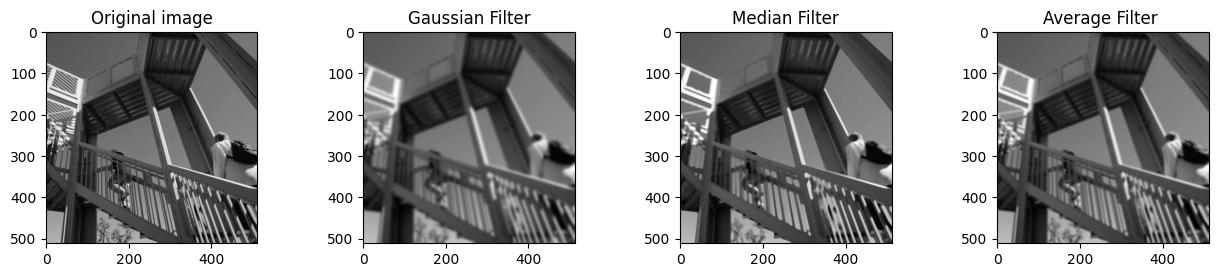

In [6]:
from scipy import misc
from scipy import ndimage
from pylab import show, title, figure, subplot, subplots_adjust, imshow

image = misc.ascent()  # load input image
Gaussian_filter = ndimage.gaussian_filter(image, sigma=3)  # gaussian filter with standard deviation = 3
median_filter = ndimage.median_filter(image, size=7)  # median filter with kernel size of 7
kernel = np.ones(shape=(6, 6)) / 18  # define kernel for average filter, kernel size is 6
average_filter = ndimage.convolve(image, kernel)  # average filter 

"displaying original image, results from gaussian, median and average filters"

h, w = 1, 4  # figure height and width 
figure(figsize=(15, 15));
subplots_adjust(hspace=0.2, wspace=0.5)
subplot(h, w, 1);
imshow(image, cmap='gray');
title('Original image')
subplot(h, w, 2);
imshow(Gaussian_filter, cmap='gray');
title('Gaussian Filter')
subplot(h, w, 3);
imshow(median_filter, cmap='gray');
title('Median Filter')
subplot(h, w, 4);
imshow(average_filter, cmap='gray');
title('Average Filter ')
show()

#### Example 4: Edge Enhancement 
Enhancing edge of an image using [prewitt function](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.prewitt)

C:\Users\Hossein\AppData\Local\Temp\ipykernel_19024\3826868623.py:5: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  image = misc.ascent()  # load input image


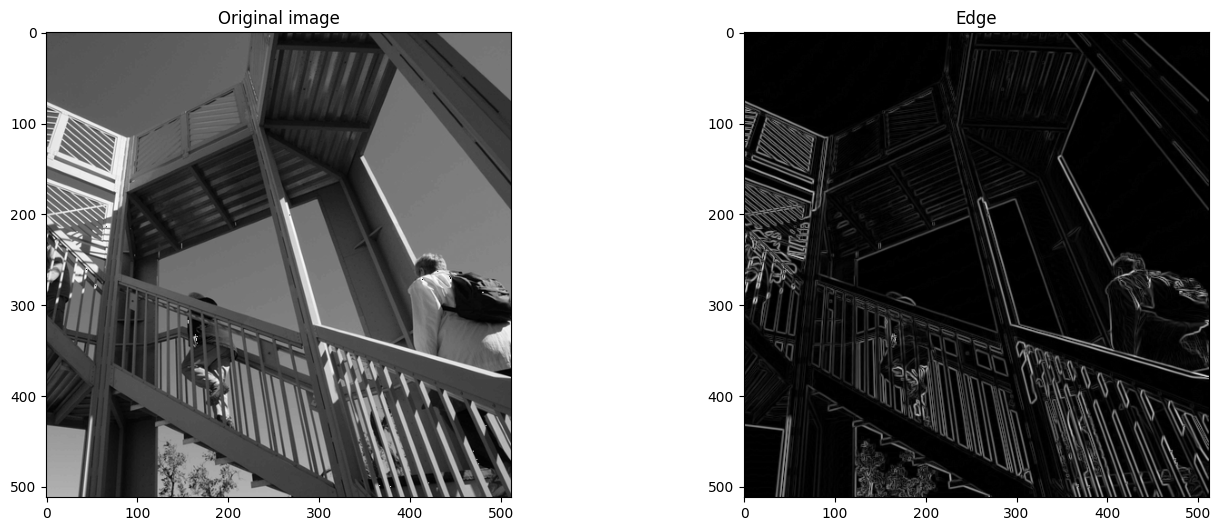

In [7]:
from scipy import misc
from skimage.filters import prewitt
from pylab import show, title, figure, subplot, subplots_adjust, imshow

image = misc.ascent()  # load input image
Edge = prewitt(image)  # find edge

h, w = 1, 2  # figure height and width 
figure(figsize=(15, 15));
subplots_adjust(hspace=0.5, wspace=0.5)
subplot(h, w, 1);
imshow(image, cmap='gray');
title('Original image')
subplot(h, w, 2);
imshow(Edge, cmap='gray');
title('Edge')
show()

#### Exercise 2
To illustrate image filtering we will try to restore an image, obtained by distorting Brain.tiff with Salt and Pepper noise (Brain_noise_SnP.tiff).
In the first part of the exercise, we will focus on Gaussian smoothing. Apply [Gaussian filtering](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html) to the noisy image with a standard deviation of 1.
- Read input image (Brain.tiff)
- Read noisy image (Brain_noise_SnP.tiff)
- Apply [Gaussian filtering](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html) to the noisy image with a standard deviation of 1.
- Calculate the difference image of the input noisy image with the obtained filtered image.
- Calculate the difference image of the obtained filtered image with the provided ground truth (Brain.tiff).
- Create a simple edge map of the obtained filtered image using the [edge function and prewitt mask](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.prewitt).
- Display input image, noisy image, gaussian filtered image, filtered noise and unfiltered noise. 

#### Report
- Repeat the process, for a [median filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html) for a kernel of size 3 and an average filter using a kernel of size 3. For the average filter you will have to create your own filter kernel.
- Calculate the [root mean squared differences (RMSD)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) of the pixels of the obtained filtered images with those of the ground truth. RMSD is a frequently used measure of the differences between values. Hint: RMSD = [sqrt](https://www.tutorialspoint.com/python/number_sqrt.htm) ([mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) (input image, filtered image))
- Display a three-by-four plot with the filtered images obtained using the different filters, the filtered noise, the noise that remained after the filtering (unfiltered) and the edge maps of the filtered image.
- Provide all three values for the RMSD between filtered image and the ground truth.
- Comment briefly on the results.
- What is the interpretation of the difference image with the ground truth and the difference image with the original input image?
- Which filter works best in terms of RMSD and why?
- Which filter preserves the edges the best?

Text(0.5, 1.0, 'orginal Edge')

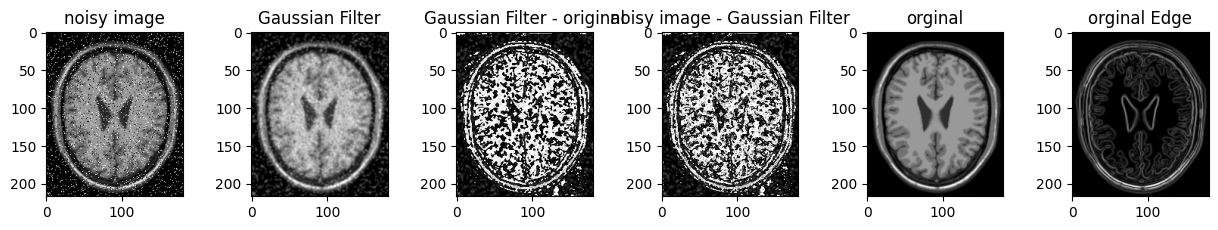

In [14]:
from skimage.metrics import mean_squared_error

def image_filter_show(denoiser=lambda x: ndimage.gaussian_filter(x, sigma=1)):
    image = plt.imread('Brain.tiff')
    noisy_img = plt.imread('Brain_noise_SnP.tiff')
    filtered = denoiser(noisy_img)
    
    rmsd = np.sqrt(mean_squared_error(image, filtered))

    Edge = prewitt(filtered)  # find edge

    return rmsd, Edge, filtered, noisy_img, image

rmsd, Edge, Gaussian_filter, noisy_img, image = image_filter_show(lambda x: ndimage.gaussian_filter(x, sigma=1))
h, w = 1,6;
figure(figsize=(15, 15));subplots_adjust(hspace=0.5, wspace=0.5)
subplot(h, w, 1);imshow(noisy_img, cmap='gray');title('noisy image')
subplot(h, w, 2);imshow(Gaussian_filter, cmap='gray');title('Gaussian Filter')
subplot(h, w, 3);imshow(Gaussian_filter-image, cmap='gray');title('Gaussian Filter - original')
subplot(h, w, 4);imshow(Gaussian_filter - noisy_img, cmap='gray');title('noisy image - Gaussian Filter')
subplot(h, w, 5);imshow(image, cmap='gray');title('orginal')
subplot(h, w, 6);imshow(prewitt(image), cmap='gray');title('orginal Edge')

RMSD: 17.802722687891535


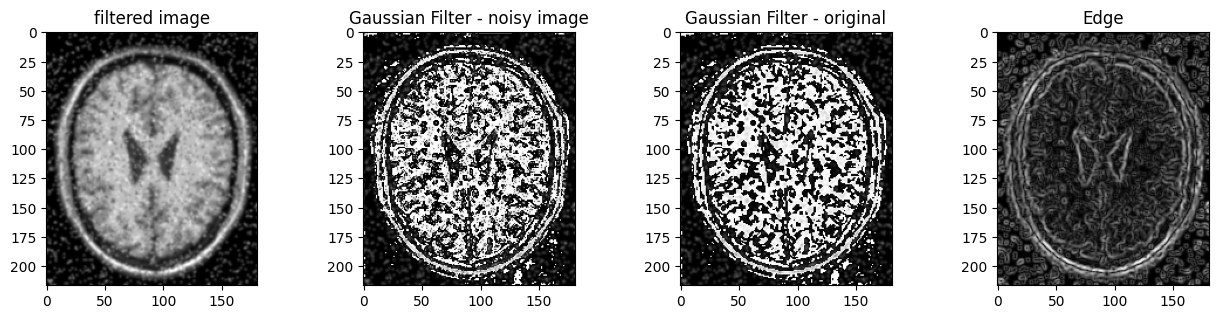

RMSD: 5.917620256334432


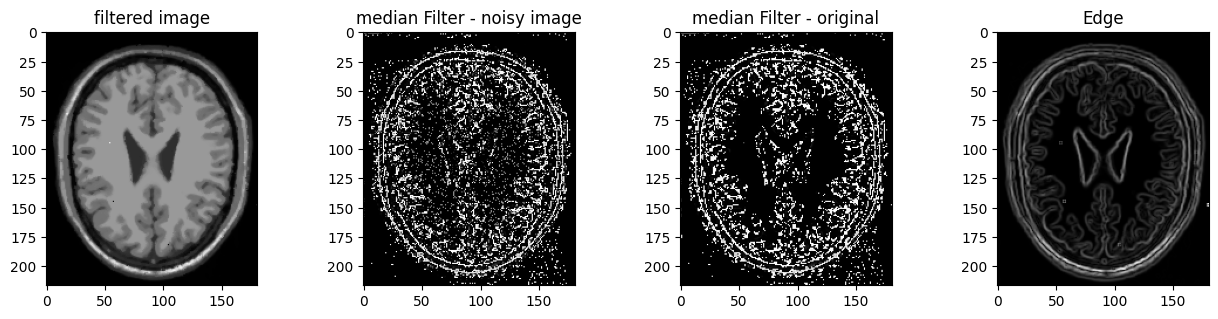

RMSD: 19.425733345799316


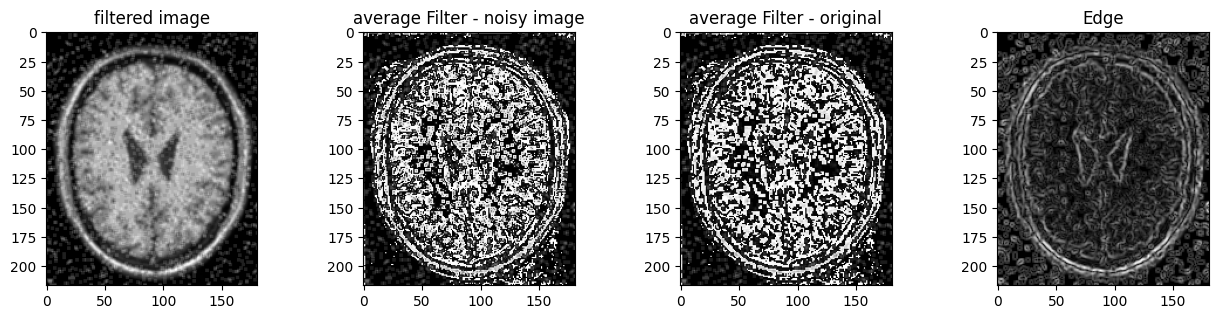

In [10]:
gausian_fil = image_filter_show(lambda x: ndimage.gaussian_filter(x, sigma=1))
median_fil = image_filter_show(lambda x: ndimage.median_filter(x, size=3))
ave_kernel = image_filter_show(lambda x: ndimage.convolve(x, np.ones(shape=(3, 3)) / 9))

def show_images(rmsd, Edge, filtered, noisy_img, image, x):
    #filtered images obtained using the different filters, the filtered noise, 
    # the noise that remained after the filtering (unfiltered) and the edge maps of the filtered image
    print(f"RMSD: {rmsd}")
    h, w = 1, 4;
    figure(figsize=(15, 15));subplots_adjust(hspace=0.5, wspace=0.5)
    subplot(h, w, 1);imshow(filtered, cmap='gray');title('filtered image')
    subplot(h, w, 2);imshow(filtered-noisy_img, cmap='gray');title(f'{x} Filter - noisy image')
    subplot(h, w, 3);imshow(filtered-image, cmap='gray');title(f'{x} Filter - original')
    subplot(h, w, 4);imshow(Edge, cmap='gray');title('Edge')
    show()

show_images(*gausian_fil, 'Gaussian')
show_images(*median_fil, 'median')
show_images(*ave_kernel, 'average')

### 3 Image segmentation
Segmentation is the task of defining the boundaries of an object or region in an image. It is often used for measuring size or volume of organs or other tissues of interest. A multitude of different methods exist and the optimal choice of segmentation method is highly dependent on the region to be segmented, and the type and quality of the input image.
#### 3.1 Thresholding
Image thresholding is the simplest and fastest segmentation method. The process comes down to defining one or more boundaries of intensity in the im- age histogram. Pixels with intensity within the boundaries will get mapped to 1 (inside), while others are considered background. The process can be extended to multiple labels using multiple (upper and lower) boundaries.
Thresholding can be done by manually selecting the boundaries, or automatically, by optimizing the boundary values with respect to a certain criterion. For instance, Otsu thresholding will automatically select boundaries that maximize the between class variance of two or more regions.
#### 3.2 Region Growing
Region growing is an iterative segmentation approach in which an initial region (usually a single seed point) is grown by including its neighbouring pixels if they fulfil certain requirements.
In its simplest form, region growing is closely related to thresholding, mainly using the image intensity to drive the algorithm. The algorithm has the benefit of taking into account spatial connectivity, thereby enabling to limit the segmentation to connected regions.
#### 3.3 Dice Coefficient
A common way to evaluate segmentations is to compare the obtained object S, with the reference or ground truth R provided by physicians after manual segmentations. A popular measure for quantitative evaluation is computing the Dice coefficient D, which compares the volumes (|.|) of the overlap of both objects to average volume,

\begin{equation*}
D(S,R)= \frac{ 2|S∩R|} { |S| + |R|}
\end{equation*}



#### Example 5: [Multi-Otsu  thresholding](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html#sphx-glr-auto-examples-segmentation-plot-multiotsu-py) 

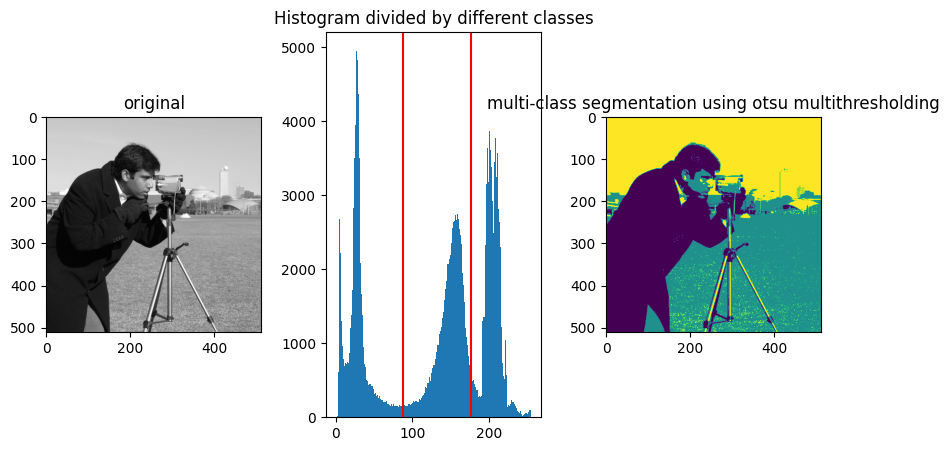

In [10]:
import numpy as np
from skimage import data
from skimage.filters import threshold_multiotsu
from pylab import show, title, figure, subplot, subplots_adjust, imshow, hist, axvline

# The input image.
image = data.camera()

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image, 3, nbins=256)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

h, w = 1, 3  # figure height and width 
figure(figsize=(10, 5));
subplots_adjust(hspace=0.3, wspace=0.3)

subplot(h, w, 1)
imshow(image, cmap='gray');
title('original')

subplot(h, w, 2)
hist(image.ravel(), bins=255, histtype='bar');
title('Histogram divided by different classes')
for thresh in thresholds:
    axvline(thresh, color='r')

subplot(h, w, 3)
imshow(regions);
title('multi-class segmentation using otsu multithresholding')
show()


#### Exercise 3.1 [Multi-Otsu  thresholding](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html#sphx-glr-auto-examples-segmentation-plot-multiotsu-py) for segmenting ventricles and white matter.
By following the example 5, solve exercise 3.1:

- Read input image (Brain.tiff) using [imread](https://pypi.org/project/imread/)
- Read groundtruth image for ventricals segmentation (GroundTruthVentricles.tiff)
- Read groundtruth image for white matter segmentation (grndTruthWM1.tiff)
- Apply [multi-Otsu threshold](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html#sphx-glr-auto-examples-segmentation-plot-multiotsu-py) on the input image with number of classes is 4.
- Plot the histogram and the four thresholds obtained from [multi-Otsu](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html#sphx-glr-auto-examples-segmentation-plot-multiotsu-py), result of multi-class segmentation using [multi-Otsu](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html#sphx-glr-auto-examples-segmentation-plot-multiotsu-py) and different four regions. Hint for plotting four different regions: 
                  b0 = regions==0;imshow(b0,'gray');title('Background');show();
                  b1 = regions==1;imshow(b1,'gray');title('Ventricles');show();
                  b2 = regions==2;imshow(b2,'gray');title('Gray matter');show();
                  b3 = regions==3;imshow(b3,'gray');title('White matter');show();
- Calculate Dice coeffient between segmented ventricals (b1) and groundtruth image for ventricals segmentation (GroundTruthVentricles[:,:,0])
- Calculate Dice coeffient between segmented gray matter (b3) and groundtruth image for white matter segmentation (grndTruthWM1[:,:,0])

- Dice coefficient function: 
    
     def dice_coeff(im1,im2):
         im1 = im1.astype(np.bool)
         im2 = im2.astype(np.bool)
         intersect = np.logical_and(im1,im2)
         return 2*intersect.sum()/(im1.sum() + im2.sum())

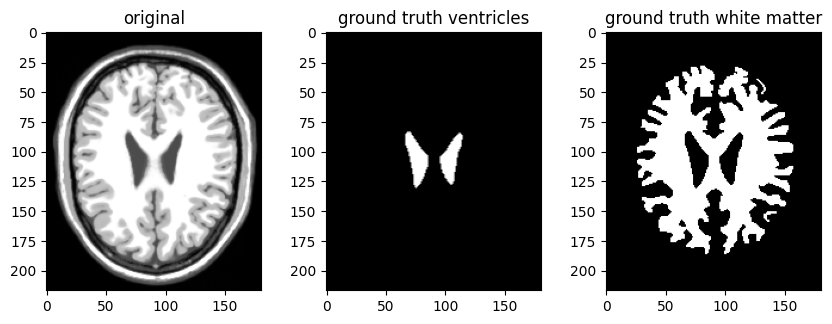

In [11]:
image = plt.imread('Brain.tiff')
i_min, i_max = np.percentile(low_contrast_image, (2, 98))
image_cliping = np.clip(low_contrast_image, i_min, i_max)
image = (image_cliping - i_min) / float(i_max - i_min)

ground_truth_ventricles = plt.imread('GroundTruthVentricles.tiff')
ground_truth_white_matter = plt.imread('grndTruthWM1.tiff')

h,w=1,3
figure(figsize=(10, 4));
subplots_adjust(hspace=0.3, wspace=0.3)
subplot(h, w, 1)
imshow(image,'gray');title('original');
subplot(h, w, 2)
imshow(ground_truth_ventricles[:,:,0],'gray');title('ground truth ventricles'); 
subplot(h, w, 3)
imshow(ground_truth_white_matter[:,:,0],'gray');title('ground truth white matter');

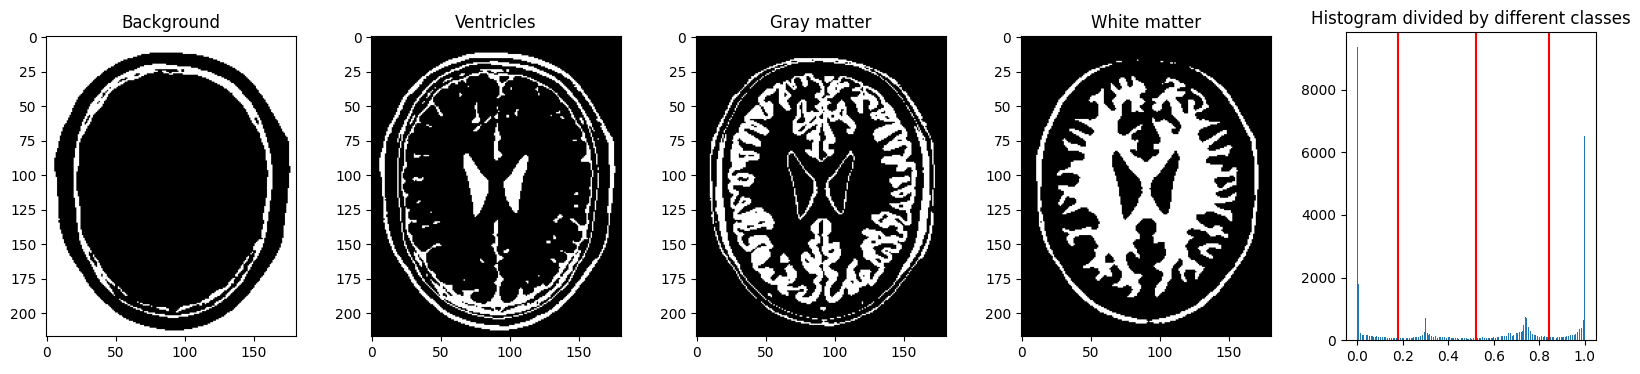

In [12]:
thresholds = threshold_multiotsu(image, 4, nbins=256)
regions = np.digitize(image, bins=thresholds)
def show_images(image, thresholds, regions):
    h, w = 1,5
    figure(figsize=(20, 4));
    subplots_adjust(hspace=0.3, wspace=0.3)
    subplot(h, w, 1)
    b0 = regions==0;imshow(b0,'gray');title('Background');
    subplot(h, w, 2)
    b1 = regions==1;imshow(b1,'gray');title('Ventricles');
    subplot(h, w, 3)
    b2 = regions==2;imshow(b2,'gray');title('Gray matter');
    subplot(h, w, 4)
    b3 = regions==3;imshow(b3,'gray');title('White matter');
    
    subplot(h, w, 5)
    hist(image.ravel(), bins=256, histtype='bar');
    title('Histogram divided by different classes')
    for thresh in thresholds:
        axvline(thresh, color='r')
    plt.show()
    
show_images(image, thresholds, regions)

In [13]:
def dice_coeff(im1,im2):
    im1 = im1.astype(bool)
    im2 = im2.astype(bool)
    intersect = np.logical_and(im1,im2)
    return 2*intersect.sum()/(im1.sum() + im2.sum())


print(f"ventricles dice coeff: {dice_coeff(regions==1, ground_truth_ventricles[:,:,0])}")
print(f"white matter dice coeff: {dice_coeff(regions==3, ground_truth_white_matter[:,:,0])}")

ventricles dice coeff: 0.2446220036877689
white matter dice coeff: 0.8526988241829461


#### Exercise 3.2 Region Growing Segmentation 
You should note that in the previous exercise it was not possible to separate the ventricles or white matter from some other structures completely. In this exercise will attempt to do this by implementing a region growing algorithm in its simplest form.
The algorithm should output a binary image with pixel values 1 for the structure under study and 0 for all other pixels. As an input it should use one or two threshold values that were obtained from the previous exercise and a seed point. 

To select your seeds for the region growing algorithm, inspect the image and find a point coordinate (X,Y) which later will be used as a seed point for your segmentation algorithm. A chosen point location has to be within the structure you are planning to segment.

Using the implemented algorithm, try to segment each of the ventricles and the white matter using suitable seed points and calculate the Dice coefficients with respect to the ground truth images introduced above.

##### Ventricles segmentation
- Step 1. Read input image (Brain.tiff)
- Step 2. Read groundtruth image for ventricals segmentation (GroundTruthVentricles.tiff)
- Step 3. Apply [multi-Otsu threshold](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html#sphx-glr-auto-examples-segmentation-plot-multiotsu-py) on the input image with number of classes is 4.
- For the first ventricle segmentation
- Step 4. Choose seed point. There are two ventricles, therefore, user has to repeat the process of choosing seed point twice. 
- Step 5. Apply region growing function using selected seed point, calculated threshold, and connectivity = 4.
- For the second ventricle segmentation 
- Step 6. Repeat steps 4 and 5
- Step 7. Get final segmentation by adding first and second ventricle segmentations. 
- Step 8. Calculate Dice coefficient between final ventricles segmentation and groundtruth (GroundTruthVentricles[:,:,0]).  

##### White matter segmentation
- Step 1. Read input image (Brain.tiff)
- Step 2. Read groundtruth image for white matter segmentation (grndTruthWM1.tiff)
- Step 3. Apply [multi-Otsu threshold](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html#sphx-glr-auto-examples-segmentation-plot-multiotsu-py) on the input image with number of classes is 4.
- Step 4. Choose seed point. 
- Step 5. Apply region growing function using selected seed point, calculated threshold, and connectivity = 4.
- Step 6. Calculate Dice coefficient between final ventricles segmentation and groundtruth (grndTruthWM1[:,:,0]).

##### Improving results
Improve you segmentation region growing results - both for the ventricles and white matter - using morphological operations. 
[Sci-kit image - morphology](https://scikit-image.org/docs/dev/api/skimage.morphology.html)

#### Report 
- For Exercises 3.1 and 3.2 plot a 2-by-3 figure of the segmentations of the ventricles and white matter (after thresholding, region growing and region growing followed by morphological operations) and their corresponding ground truth.
- Provide a table of the obtained Dice coefficients for each method and each structure.
- Briefly comment on the obtained results for the segmentations and corresponding measures.
- What morphological methods did you use? Why?

#### Hints on writing your own region growing function:
To build this function:
- Start from the seed point
- List the 4 (or 8) neighboring pixels
- Check if their intensity falls within the threshold boundaries.
- Grow your region by adding the pixels that meet the condition.
- List all new neighboring pixels of the obtained new region.
- Repeat until there are no more pixels added.

It may be handy to store the indexes (locations) and values of pixels which are already marked inside and those, which are currently marked as neighbors. For example: 0 - outside, 1 - inside, 2 - neighbor.

In [63]:
### your code is here 

def region_growing(img, seed, threshold):
    binarySeg = np.zeros_like(img)
    for s in seed:
        binarySeg[s] = 1
    neighbors = seed
    i_j = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    while len(neighbors) > 0:
        n = neighbors.pop()
        for i, j in i_j:
            x, y = n[0] + i, n[1] + j
            if x < 0 or y < 0 or x >= img.shape[0] or y >= img.shape[1]: continue
            if binarySeg[x, y] != 0: continue
            if img[x, y] < threshold[0] or img[x, y] > threshold[1]: continue
            
            binarySeg[x, y] = 1
            neighbors.append((x, y))
    return binarySeg

thresholds = threshold_multiotsu(image, 4, nbins=256)
b1_seg = region_growing(image, [(90, 110),(110, 80)], thresholds[:2])
b3_seg = region_growing(image, [(100, 60)], [thresholds[-1], 100])

# w,h = 1,2
# figure(figsize=(10, 4));
# subplots_adjust(hspace=0.3, wspace=0.3)
# subplot(w, h, 1)
# imshow(b1_seg,'gray');title('b1_seg');
# subplot(w, h, 2)
# imshow(b3_seg,'gray');title('b3_seg');

print('growing region')
print(f"ventricles dice coeff: {dice_coeff(b1_seg, ground_truth_ventricles[:,:,0])}")
print(f"white matter dice coeff: {dice_coeff(b3_seg, ground_truth_white_matter[:,:,0])}")

growing region
ventricles dice coeff: 0.8953880764904387
white matter dice coeff: 0.9140181329082395


In [64]:
from skimage.morphology import binary_dilation, binary_erosion, binary_closing, binary_opening, disk
def improve_segmentation(binary_seg):
    binary_seg = binary_dilation(binary_seg, disk(2))
    binary_seg = binary_erosion(binary_seg, disk(2))
    # binary_seg = binary_closing(binary_seg, disk(2))
    # binary_seg = binary_opening(binary_seg, disk(2))
    return binary_seg

b1_seg_morph = improve_segmentation(b1_seg)
b3_seg_morph = improve_segmentation(b3_seg)

# w,h = 1,2
# figure(figsize=(10, 4));
# subplots_adjust(hspace=0.3, wspace=0.3)
# subplot(w, h, 1)
# imshow(b1_seg_morph,'gray');title('b1_seg_morph');
# subplot(w, h, 2)
# imshow(b3_seg_morph,'gray');title('b3_seg_morph');

print('morphological operations')
print(f"ventricles dice coeff: {dice_coeff(b1_seg_morph, ground_truth_ventricles[:,:,0])}")
print(f"white matter dice coeff: {dice_coeff(b3_seg_morph, ground_truth_white_matter[:,:,0])}")

morphological operations
ventricles dice coeff: 0.8953880764904387
white matter dice coeff: 0.9207803724504877


### used morphological operations
Opening and closing would effect the details of the edges of the brain as it would remove the gaps by either closing them or opening them. dilation and erosion would effect the size of the brain as it would either increase or decrease the size of the brain but since they are done in pairs, the size of the brain would not change. 

the dice coefficent is higher for the morphological operations as the edges are more defined and the size of the brain is more accurate.

ventricles
thresholding dice coeff: 0.2446220036877689
region growing dice coeff: 0.8953880764904387
morphological dice coeff: 0.8953880764904387
white matter
thresholding dice coeff: 0.8526988241829461
region growing dice coeff: 0.9140181329082395
morphological dice coeff: 0.9207803724504877


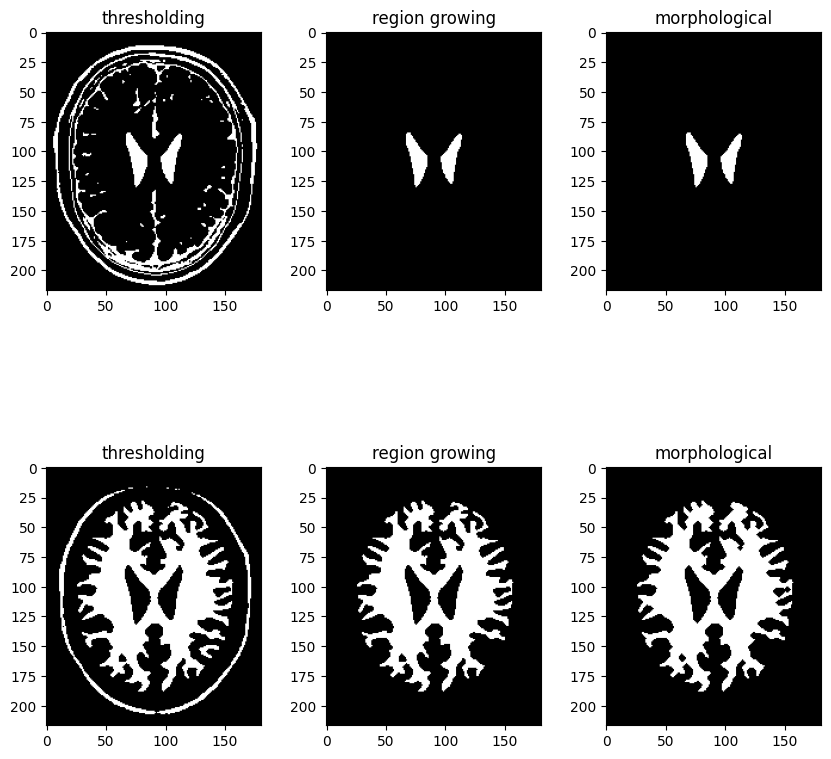

In [68]:
w,h = 2,3
figure(figsize=(10, 10));
subplots_adjust(hspace=0.3, wspace=0.3)
subplot(w, h, 1)
imshow(regions==1,'gray');title('thresholding');
subplot(w, h, 2)
imshow(b1_seg,'gray');title('region growing');
subplot(w, h, 3)
imshow(b1_seg_morph,'gray');title('morphological');

subplot(w, h, 4)
imshow(regions==3,'gray');title('thresholding');
subplot(w, h, 5)
imshow(b3_seg,'gray');title('region growing');
subplot(w, h, 6)
imshow(b3_seg_morph,'gray');title('morphological');

print('ventricles')
print(f"thresholding dice coeff: {dice_coeff(regions==1, ground_truth_ventricles[:,:,0])}")
print(f"region growing dice coeff: {dice_coeff(b1_seg, ground_truth_ventricles[:,:,0])}")
print(f"morphological dice coeff: {dice_coeff(b1_seg_morph, ground_truth_ventricles[:,:,0])}")

print('white matter')
print(f"thresholding dice coeff: {dice_coeff(regions==3, ground_truth_white_matter[:,:,0])}")
print(f"region growing dice coeff: {dice_coeff(b3_seg, ground_truth_white_matter[:,:,0])}")
print(f"morphological dice coeff: {dice_coeff(b3_seg_morph, ground_truth_white_matter[:,:,0])}")